In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import pathlib

In [3]:
output_dir = '../results_Mar4/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
traj_T = np.load('../results_final_Dec22/trajectories_T_extreme.npy')
with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_phate = scaler.transform(adata.obsm['X_phate'])
traj_A_gene_all = np.load('../results_final_Dec22/traj_gene_space_A.npy')
traj_T_gene_all = np.load('../results_final_Dec22/traj_gene_space_T.npy')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = ['ESRRA', 'ZEB1', 'CDH1']
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

ESRRA True
ZEB1 True
CDH1 True


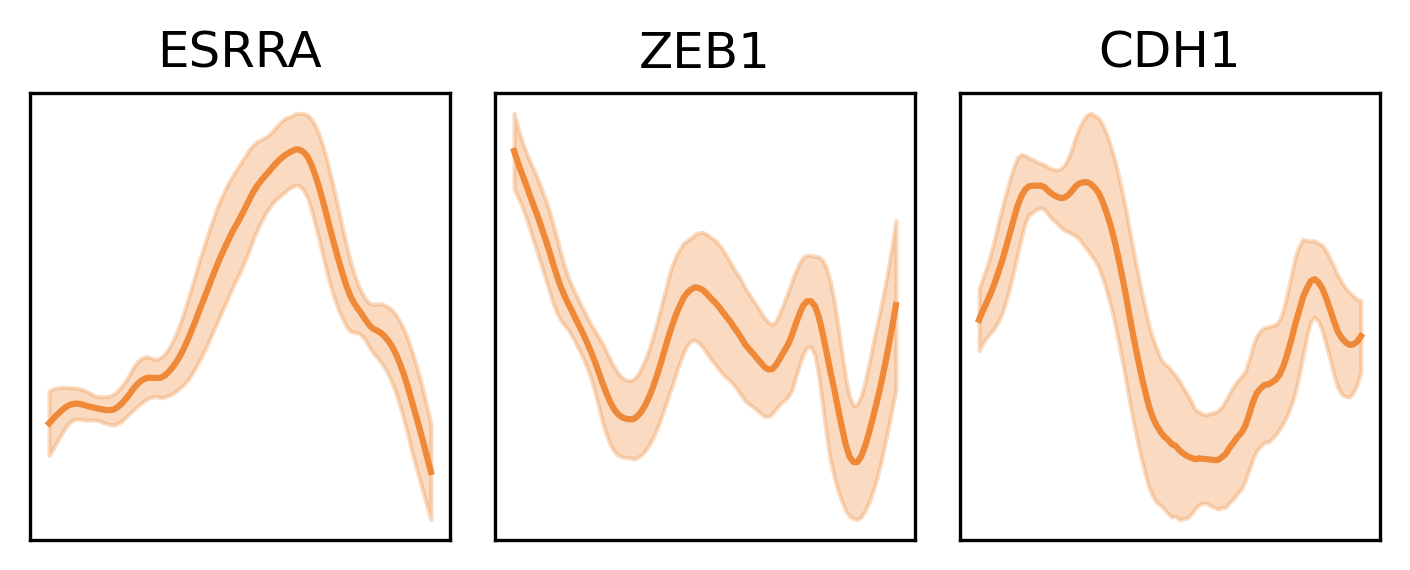

In [13]:

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='#ef8938', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
# plt.savefig(f'{output_dir}/validation_tumor.pdf', bbox_inches='tight', transparent=True)
plt.show()


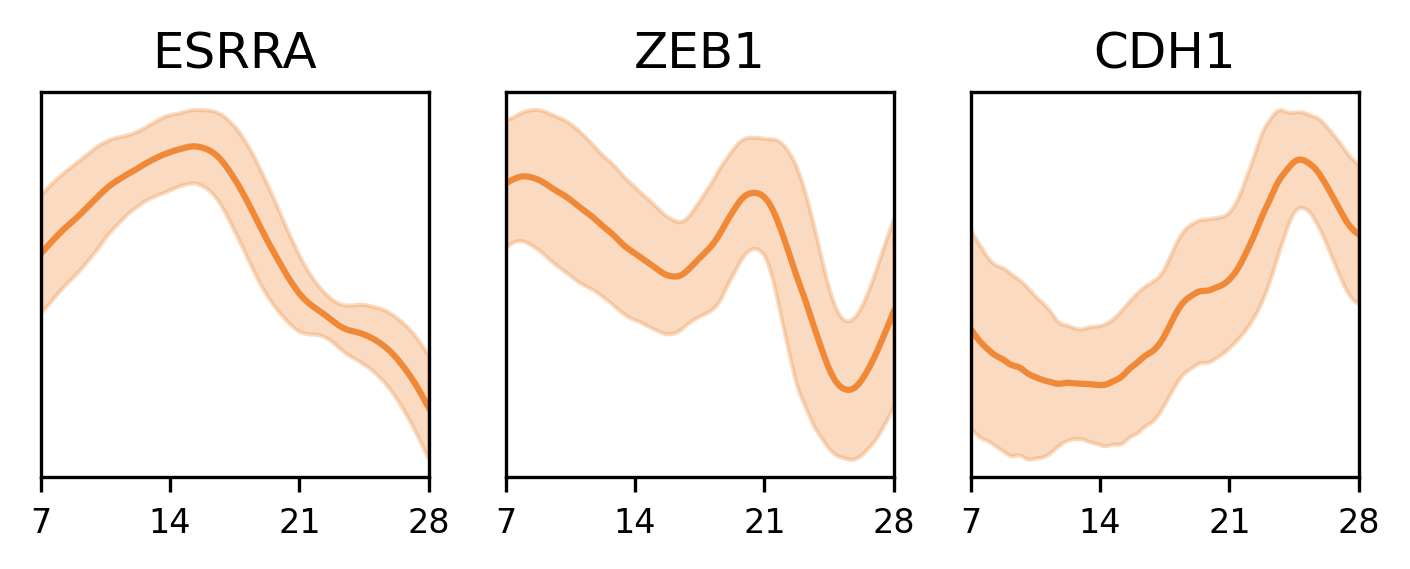

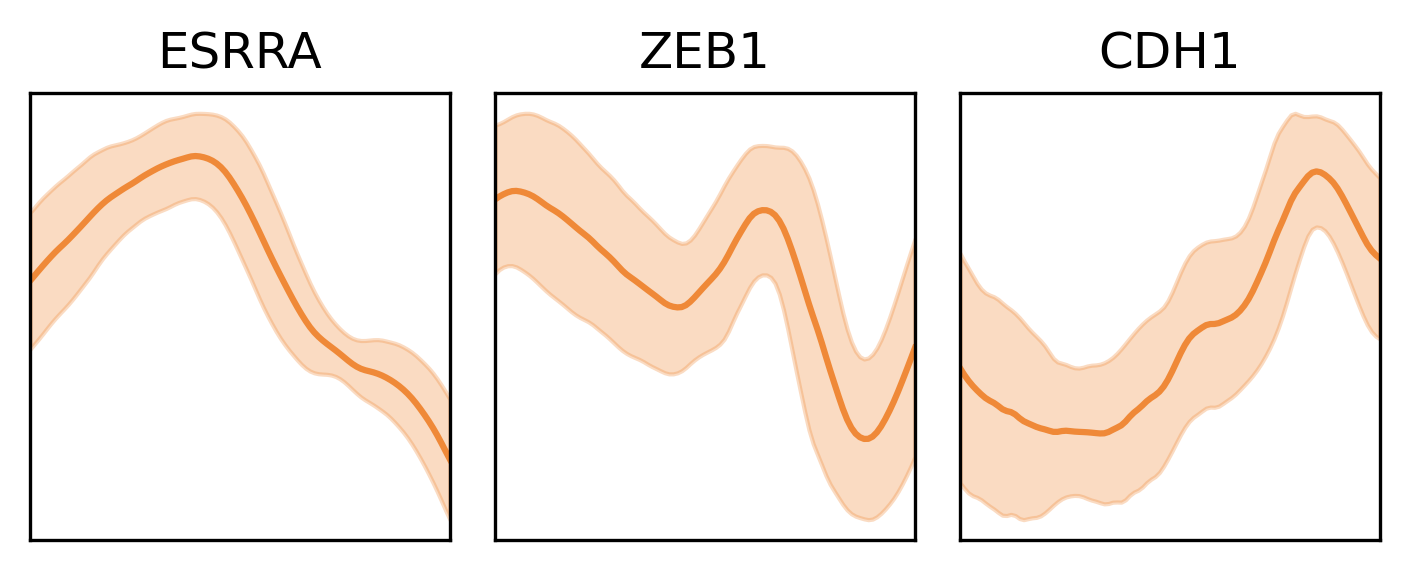

In [14]:
# ... existing code ...

# Define the original time scale (non-uniform)
# Update to reflect the actual non-uniform time scale
original_time_points = np.array([0, 2, 16, 30])  # The actual non-uniform time points
original_indices = np.linspace(0, 99, 4, dtype=int)  # Indices in the 100-point array

# Create a mapping from indices to time points
full_original_time = np.zeros(100)
for i in range(len(original_time_points)-1):
    start_idx = original_indices[i]
    end_idx = original_indices[i+1]
    start_time = original_time_points[i]
    end_time = original_time_points[i+1]
    # Linear interpolation between time points
    full_original_time[start_idx:end_idx+1] = np.linspace(start_time, end_time, end_idx-start_idx+1)

# Define the new uniform time scale you want
new_time = np.array([7, 14, 21, 28])  # Your desired time points

# Create a figure
fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    
    # Interpolate the data to the new time scale
    from scipy.interpolate import interp1d
    
    # Create interpolation function for mean and std using the correct time scale
    f_mean = interp1d(full_original_time, traj_T_mean[:, i], kind='cubic', bounds_error=False, fill_value="extrapolate")
    f_std = interp1d(full_original_time, traj_T_std[:, i], kind='cubic', bounds_error=False, fill_value="extrapolate")
    
    # Generate a dense uniform time scale for smooth plotting
    plot_time = np.linspace(7, 28, 100)  # 100 points from 7 to 28
    
    # Compute interpolated values
    plot_mean = f_mean(plot_time)
    plot_std = f_std(plot_time)
    
    # Plot with the new time scale
    ax.plot(plot_time, plot_mean, color='#ef8938', label='Tumor-forming')
    ax.fill_between(plot_time, plot_mean - plot_std, plot_mean + plot_std, alpha=0.3, color='#ef8938')
    
    # Add tick marks at the specific time points
    tick_positions = [7, 14, 21, 28]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([str(t) for t in tick_positions], fontsize=8)
    
    ax.set_title(gene)
    ax.set_xlim(7, 28)  # Set x-axis limits to your desired range
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{output_dir}/validation_tumor_reset_timescale.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

# Create a second figure without tick labels and tick lines
fig2, axes2 = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes2[i]
    
    # Create interpolation function for mean and std using the correct time scale
    f_mean = interp1d(full_original_time, traj_T_mean[:, i], kind='cubic', bounds_error=False, fill_value="extrapolate")
    f_std = interp1d(full_original_time, traj_T_std[:, i], kind='cubic', bounds_error=False, fill_value="extrapolate")
    
    # Generate a dense uniform time scale for smooth plotting
    plot_time = np.linspace(7, 28, 100)  # 100 points from 7 to 28
    
    # Compute interpolated values
    plot_mean = f_mean(plot_time)
    plot_std = f_std(plot_time)
    
    # Plot with the new time scale
    ax.plot(plot_time, plot_mean, color='#ef8938', label='Tumor-forming')
    ax.fill_between(plot_time, plot_mean - plot_std, plot_mean + plot_std, alpha=0.3, color='#ef8938')
    
    # Remove all ticks and tick lines
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove tick lines
    ax.tick_params(axis='both', which='both', length=0)
    
    ax.set_title(gene)
    ax.set_xlim(7, 28)  # Set x-axis limits to your desired range

fig2.tight_layout()
plt.savefig(f'{output_dir}/validation_tumor_reset_timescale_no_ticks.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()